In [1]:
import polars as pl
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.spatial.transform import Rotation as R
from tqdm import tqdm

In [2]:
ar_12 = pl.read_csv('ar_12.csv')
ar_88 = pl.read_csv('ar_88.csv')
ar_89 = pl.read_csv('ar_89.csv')
mc_df = pl.read_csv('mc.csv')

ar_12 = ar_12.with_columns(pl.col("time").str.strptime(pl.Datetime, format="%Y-%m-%dT%H:%M:%S%.6f"))
ar_88 = ar_88.with_columns(pl.col("time").str.strptime(pl.Datetime, format="%Y-%m-%dT%H:%M:%S%.6f"))
ar_89 = ar_89.with_columns(pl.col("time").str.strptime(pl.Datetime, format="%Y-%m-%dT%H:%M:%S%.6f"))
mc_df = mc_df.with_columns(pl.col("time").str.strptime(pl.Datetime, format="%Y-%m-%dT%H:%M:%S%.6f"))

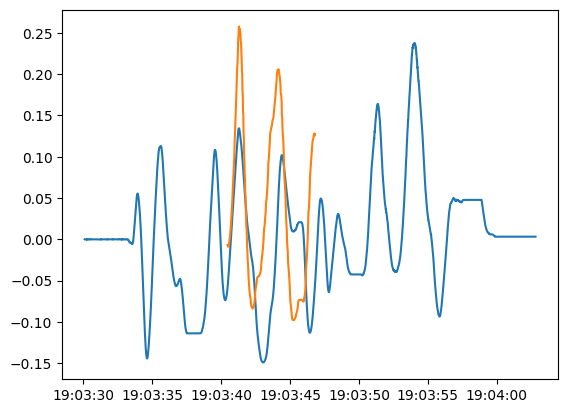

In [3]:
plt.plot(mc_df['time'], mc_df['x'])
plt.plot(ar_12['time'], ar_12['x'])

In [4]:
# ar_88 = ar_12

In [5]:
_ar88_x = interp1d(ar_88['time'].dt.epoch(), ar_88['x'], fill_value='extrapolate')(mc_df['time'].dt.epoch())
_ar88_y = interp1d(ar_88['time'].dt.epoch(), ar_88['y'], fill_value='extrapolate')(mc_df['time'].dt.epoch())
_ar88_z = interp1d(ar_88['time'].dt.epoch(), ar_88['z'], fill_value='extrapolate')(mc_df['time'].dt.epoch())
_ar88_rx = interp1d(ar_88['time'].dt.epoch(), ar_88['rx'], fill_value='extrapolate')(mc_df['time'].dt.epoch())
_ar88_ry = interp1d(ar_88['time'].dt.epoch(), ar_88['ry'], fill_value='extrapolate')(mc_df['time'].dt.epoch())
_ar88_rz = interp1d(ar_88['time'].dt.epoch(), ar_88['rz'], fill_value='extrapolate')(mc_df['time'].dt.epoch())
_ar88 = pl.from_dict({'time':mc_df['time'], 'x':_ar88_x, 'y':_ar88_y, 'z':_ar88_z, 'rx':_ar88_rx, 'ry':_ar88_ry, 'rz':_ar88_rz})

_ar12_x = interp1d(ar_88['time'].dt.epoch() , ar_12['x'], fill_value='extrapolate')(mc_df['time'].dt.epoch())
_ar12_y = interp1d(ar_88['time'].dt.epoch() , ar_12['y'], fill_value='extrapolate')(mc_df['time'].dt.epoch())
_ar12_z = interp1d(ar_88['time'].dt.epoch() , ar_12['z'], fill_value='extrapolate')(mc_df['time'].dt.epoch())
_ar12_rx = interp1d(ar_88['time'].dt.epoch(), ar_12['rx'], fill_value='extrapolate')(mc_df['time'].dt.epoch())
_ar12_ry = interp1d(ar_88['time'].dt.epoch(), ar_12['ry'], fill_value='extrapolate')(mc_df['time'].dt.epoch())
_ar12_rz = interp1d(ar_88['time'].dt.epoch(), ar_12['rz'], fill_value='extrapolate')(mc_df['time'].dt.epoch())
_ar12 = pl.from_dict({'time':mc_df['time'], 'x':_ar12_x, 'y':_ar12_y, 'z':_ar12_z, 'rx':_ar12_rx, 'ry':_ar12_ry, 'rz':_ar12_rz})

_ar89_x = interp1d(ar_88['time'].dt.epoch() , ar_89['x'], fill_value='extrapolate')(mc_df['time'].dt.epoch())
_ar89_y = interp1d(ar_88['time'].dt.epoch() , ar_89['y'], fill_value='extrapolate')(mc_df['time'].dt.epoch())
_ar89_z = interp1d(ar_88['time'].dt.epoch() , ar_89['z'], fill_value='extrapolate')(mc_df['time'].dt.epoch())
_ar89_rx = interp1d(ar_88['time'].dt.epoch(), ar_89['rx'], fill_value='extrapolate')(mc_df['time'].dt.epoch())
_ar89_ry = interp1d(ar_88['time'].dt.epoch(), ar_89['ry'], fill_value='extrapolate')(mc_df['time'].dt.epoch())
_ar89_rz = interp1d(ar_88['time'].dt.epoch(), ar_89['rz'], fill_value='extrapolate')(mc_df['time'].dt.epoch())
_ar89 = pl.from_dict({'time':mc_df['time'], 'x':_ar89_x, 'y':_ar89_y, 'z':_ar89_z, 'rx':_ar89_rx, 'ry':_ar89_ry, 'rz':_ar89_rz})

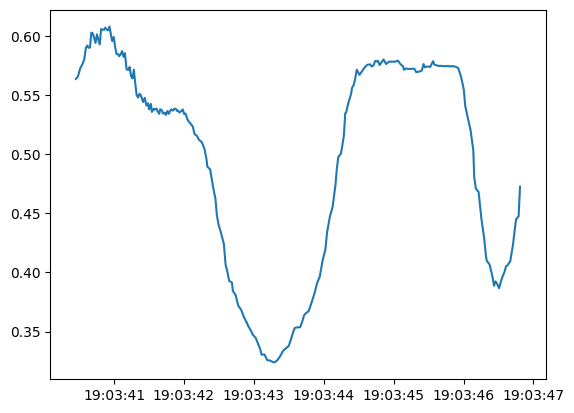

In [6]:
plt.plot(ar_12['time'], ar_12['z'])

In [7]:
"""reference"""
offsets = {
    12: np.array([-0.087, -0.034, 0.069]),
    14: np.array([0.00, 0.1025, -0.069]),
    20: np.array([0.00, 0.01, -0.069]),
    88: np.array([0.00, -0.034, -0.1075]),
    89: np.array([0.087, -0.034, 0.069]),
}

# _offset_88 = 

In [8]:
from itertools import product
# Given array
arr = np.array([0.00, -0.034, -0.1075])
arr = np.array([-0.087, -0.034, 0.069])

# Create ranges from +1 to -1 for the first and third elements
range_first = np.linspace(arr[0] + 1, arr[0] - 1, num=300)  # Adjust num for desired granularity
range_third = np.linspace(arr[2] + 1, arr[2] - 1, num=300)

# Create a list of arrays with all combinations of the ranges for the first and third elements
list_of_arrays = [np.array([first, arr[1], third]) for first, third in product(range_first, range_third)]

In [9]:
_rmats_88 = R.from_rotvec(_ar88[['rx', 'ry', 'rz']].to_numpy()).as_matrix()
tvecs_88 = _ar88[['x', 'y', 'z']].to_numpy()
tv_88 = tvecs_88[0].reshape(3,1)
mocap_tvec = mc_df[['x', 'y', 'z']].to_numpy().T

error_88 = []
for _l in tqdm(list_of_arrays):
    _translation = _rmats_88[0].T @ (((_rmats_88 @ _l.reshape(3,1)).T + tvecs_88.T) - tv_88)
    error_88.append(np.nanmean(np.abs(_translation[0] - mocap_tvec), axis=1))
    
_rmats_12 = R.from_rotvec(_ar12[['rx', 'ry', 'rz']].to_numpy()).as_matrix()
tvecs_12 = _ar12[['x', 'y', 'z']].to_numpy()
tv_12 = tvecs_12[0].reshape(3,1)

error_12 = []
for _l in tqdm(list_of_arrays):
    _translation = _rmats_88[0].T @ (((_rmats_12 @ _l.reshape(3,1)).T + tvecs_12.T) - tv_12)
    error_12.append(np.nanmean(np.abs(_translation[0] - mocap_tvec), axis=1))
    
    
_rmats_89 = R.from_rotvec(_ar89[['rx', 'ry', 'rz']].to_numpy()).as_matrix()
tvecs_89 = _ar89[['x', 'y', 'z']].to_numpy()
tv_89 = tvecs_89[0].reshape(3,1)
error_89 = []
for _l in tqdm(list_of_arrays):
    _translation = _rmats_88[0].T @ (((_rmats_89 @ _l.reshape(3,1)).T + tvecs_89.T) - tv_89)
    error_89.append(np.nanmean(np.abs(_translation[0] - mocap_tvec), axis=1))



  0%|          | 0/90000 [00:00<?, ?it/s]

  0%|          | 0/90000 [00:00<?, ?it/s]C:\Users\Pintu\AppData\Local\Temp\ipykernel_52920\123233282.py:18: RuntimeWarning: Mean of empty slice
  error_12.append(np.nanmean(np.abs(_translation[0] - mocap_tvec), axis=1))
  0%|          | 0/90000 [00:00<?, ?it/s]C:\Users\Pintu\AppData\Local\Temp\ipykernel_52920\123233282.py:27: RuntimeWarning: Mean of empty slice
  error_89.append(np.nanmean(np.abs(_translation[0] - mocap_tvec), axis=1))
100%|██████████| 90000/90000 [00:14<00:00, 6417.76it/s]


In [10]:
idx_88 = np.argmin((np.array(error_88)[:,2] + np.array(error_88)[:,0] + np.array(error_88)[:,1]))
idx_12 = np.argmin((np.array(error_12)[:,2] + np.array(error_12)[:,0] + np.array(error_12)[:,1]))
idx_89 = np.argmin((np.array(error_89)[:,2] + np.array(error_89)[:,0] + np.array(error_89)[:,1]))

In [48]:
_translation_88 = _rmats_88[0].T @ (((_rmats_88 @ list_of_arrays[idx_88].reshape(3,1)).T + tvecs_88.T) - tv_88)
_translation_12 = _rmats_88[0].T @ (((_rmats_12 @ list_of_arrays[idx_12].reshape(3,1)).T + tvecs_12.T) - tv_12)
_translation_89 = _rmats_88[0].T @ (((_rmats_89 @ list_of_arrays[idx_89].reshape(3,1)).T + tvecs_89.T) - tv_89)

In [49]:
(_rmats_88 @ list_of_arrays[idx_88].reshape(3,1)).T

array([[[-0.00325693, -0.00326878, -0.00326009, ..., -0.00343412,
         -0.00343787, -0.00344159],
        [ 0.03401178,  0.0340089 ,  0.03401024, ...,  0.03400879,
          0.03400877,  0.03400875],
        [-0.00126193, -0.00130811, -0.00129485, ..., -0.0007813 ,
         -0.00076531, -0.00074926]]])

In [64]:
list_of_arrays[idx_12]

array([ 0.913, -0.034,  1.069])

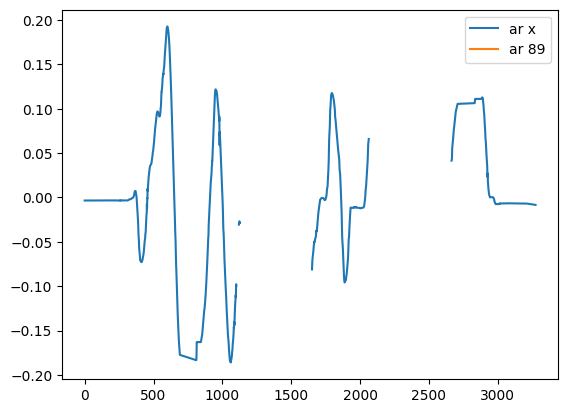

In [60]:
plt.plot(_translation_88[0].T[:,0], label = 'ar x')
plt.plot(_translation_89[0].T[:,0], label = 'ar 89')
# plt.plot(mc_df['x'], label = 'mocap x')
plt.legend()

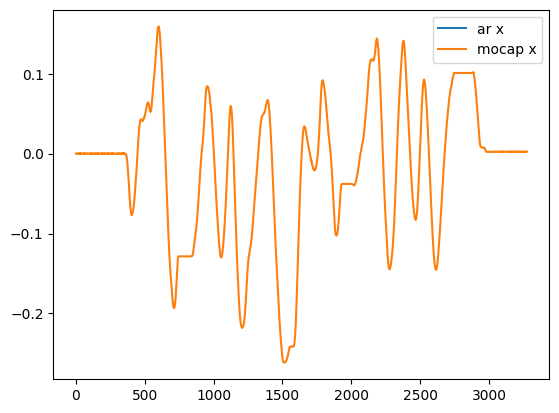

In [51]:
plt.plot(_translation[0].T[:,2], label = 'ar x')
plt.plot(mc_df['z'], label = 'mocap x')
plt.legend()

In [52]:
coordinate

NameError: name 'idx' is not defined